In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import GRU
import os
import glob
import matplotlib.pyplot as plt
# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [2]:
row_data_folder = (glob.glob('./row_data/**/*.csv', recursive=True))

In [3]:
for filename in row_data_folder[:]:
    if 'Thingy' in filename:
        row_data_folder.remove(filename)
    else:
        continue

In [4]:
base_df = pd.DataFrame()

for filename in row_data_folder:
    print(filename)
    # load data into a DataFrame
    new_df = pd.read_csv(filename)
    
    # merge into the base DataFrame
    base_df = pd.concat([base_df, new_df])
base_df.reset_index(drop=True, inplace=True)

./row_data/2021/s1870467/Respeck_s1870467_Climbing stairs_06-10-2021_11-26-24.csv
./row_data/2021/s1870467/Respeck_s1870467_Standing_29-09-2021_11-45-59.csv
./row_data/2021/s1870467/Respeck_s1870467_Falling on the back_05-10-2021_09-31-28.csv
./row_data/2021/s1870467/Respeck_s1870467_Movement_29-09-2021_11-56-20.csv
./row_data/2021/s1870467/Respeck_s1870467_Lying down on stomach_29-09-2021_11-49-18.csv
./row_data/2021/s1870467/Respeck_s1870467_Sitting bent backward_29-09-2021_11-45-03.csv
./row_data/2021/s1870467/Respeck_s1870467_Lying down left_29-09-2021_11-47-37.csv
./row_data/2021/s1870467/Respeck_s1870467_Lying down on back_29-09-2021_11-46-48.csv
./row_data/2021/s1870467/Respeck_s1870467_Descending stairs_06-10-2021_11-27-15.csv
./row_data/2021/s1870467/Respeck_s1870467_Sitting bent forward_29-09-2021_11-44-15.csv
./row_data/2021/s1870467/Respeck_s1870467_Walking at normal speed_07-10-2021_09-10-03.csv
./row_data/2021/s1870467/Respeck_s1870467_Running_07-10-2021_09-48-21.csv
./ro

./row_data/2021/s2125423/Respeck_s2125423_Sitting bent forward_03-10-2021_15-50-43.csv
./row_data/2021/s2125423/Respeck_s2125423_Falling on the right_03-10-2021_16-28-55.csv
./row_data/2021/s2125423/Respeck_s2125423_Climbing stairs_03-10-2021_17-21-54.csv
./row_data/2021/s2125423/Respeck_s2125423_Descending stairs_03-10-2021_17-20-21.csv
./row_data/2021/s2125423/Respeck_s2125423_Lying down on stomach_03-10-2021_16-01-39.csv
./row_data/2021/s1757177/Respeck_s1757177_Sitting bent forward_06-10-2021_16-41-05.csv
./row_data/2021/s1757177/Respeck_s1757177_Standing_02-10-2021_13-46-10.csv
./row_data/2021/s1757177/Respeck_s1757177_Running_02-10-2021_14-09-21.csv
./row_data/2021/s1757177/Respeck_s1757177_Descending stairs_02-10-2021_13-57-31.csv
./row_data/2021/s1757177/Respeck_s1757177_Sitting_02-10-2021_13-38-45.csv
./row_data/2021/s1757177/Respeck_s1757177_Lying down right_06-10-2021_20-38-38.csv
./row_data/2021/s1757177/Respeck_s1757177_Climbing stairs_06-10-2021_16-34-18.csv
./row_data/20

./row_data/2021/s1865457/Respeck_s1865457_Lying down right_30-09-2021_10-22-10.csv
./row_data/2021/s1865457/Respeck_s1865457_Falling on the left_30-09-2021_11-54-11.csv
./row_data/2021/s1865457/Respeck_s1865457_Lying down on back_30-09-2021_10-20-19.csv
./row_data/2021/s1865457/Respeck_s1865457_Desk work_30-09-2021_10-27-45.csv
./row_data/2021/s1865457/Respeck_s1865457_Descending stairs_30-09-2021_12-57-12.csv
./row_data/2021/s1800883/Respeck_s1800883_Lying down on back_29-09-2021_13-38-01.csv
./row_data/2021/s1800883/Respeck_s1800883_Sitting bent backward_29-09-2021_13-35-01.csv
./row_data/2021/s1800883/Respeck_s1800883_Running_29-09-2021_14-41-45.csv
./row_data/2021/s1800883/Respeck_s1800883_Standing_29-09-2021_13-28-54.csv
./row_data/2021/s1800883/Respeck_s1800883_Descending stairs_29-09-2021_14-35-23.csv
./row_data/2021/s1800883/Respeck_s1800883_Climbing stairs_29-09-2021_14-36-21.csv
./row_data/2021/s1800883/Respeck_s1800883_Lying down right_29-09-2021_13-41-27.csv
./row_data/2021

./row_data/2021/s2211162/Respeck_s2211162_Climbing stairs_28-09-2021_11-21-15.csv
./row_data/2021/s2211162/Respeck_s2211162_Standing_28-09-2021_10-26-50.csv
./row_data/2021/s2211162/Respeck_s2211162_Lying down left_28-09-2021_10-28-12.csv
./row_data/2021/s2211162/Respeck_s2211162_Lying down right_28-09-2021_10-29-37.csv
./row_data/2021/s2211162/Respeck_s2211162_Lying down on back_28-09-2021_10-32-52.csv
./row_data/2021/s2211162/Respeck_s2211162_Lying down on stomach_28-09-2021_10-31-36.csv
./row_data/2021/s2211162/Respeck_s2211162_Running_28-09-2021_11-19-48.csv
./row_data/2021/s2211162/Respeck_s2211162_Descending stairs_28-09-2021_11-13-56.csv
./row_data/2021/s2211162/Respeck_s2211162_Sitting_28-09-2021_10-22-16.csv
./row_data/2021/s1761322/Respeck_s1761322_Sitting_27-09-2021_10-44-15.csv
./row_data/2021/s1761322/Respeck_s1761322_Sitting bent forward_27-09-2021_10-47-12.csv
./row_data/2021/s1761322/Respeck_s1761322_Lying down right_27-09-2021_11-04-14.csv
./row_data/2021/s1761322/Resp

./row_data/2021/s2250677/Respeck_s2250677_Falling on the right_04-10-2021_16-57-15.csv
./row_data/2021/s2250677/Respeck_s2250677_Running_04-10-2021_16-21-45.csv
./row_data/2021/s2250677/Respeck_s2250677_Standing_04-10-2021_16-09-34.csv
./row_data/2021/s2250677/Respeck_s2250677_Falling on knees_04-10-2021_16-39-21.csv
./row_data/2021/s2250677/Respeck_s2250677_Lying down on back_04-10-2021_16-11-56.csv
./row_data/2021/s2250677/Respeck_s2250677_Climbing stairs_04-10-2021_16-23-49.csv
./row_data/2021/s2250677/Respeck_s2250677_Movement_04-10-2021_16-30-39.csv
./row_data/2021/s2250677/Respeck_s2250677_Lying down right_04-10-2021_16-14-52.csv
./row_data/2021/s2250677/Respeck_s2250677_Walking at normal speed_04-10-2021_16-20-14.csv
./row_data/2021/s2250677/Respeck_s2250677_Descending stairs_04-10-2021_16-26-45.csv
./row_data/2021/s2250677/Respeck_s2250677_Sitting_04-10-2021_16-06-14.csv
./row_data/2021/s2250677/Respeck_s2250677_Lying down on stomach_04-10-2021_16-16-54.csv
./row_data/2021/s225

./row_data/2021/s1894401/Respeck_s1894401_Lying down left_01-10-2021_12-03-57.csv
./row_data/2021/s1541031/Respeck_s1541031_Movement_06-10-2021_11-11-18.csv
./row_data/2021/s1541031/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
./row_data/2021/s1541031/Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55.csv
./row_data/2021/s1541031/Respeck_s1541031_Standing_06-10-2021_11-10-10.csv
./row_data/2021/s1541031/Respeck_s1541031_Falling on the right_06-10-2021_16-10-42.csv.csv
./row_data/2021/s1541031/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
./row_data/2021/s1541031/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
./row_data/2021/s1541031/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
./row_data/2021/s1541031/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
./row_data/2021/s1541031/Respeck_s1541031_Sitting_06-10-2021_10-25-01.csv
./row_data/2021/s1541031/Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50.csv
./row_data/2021/s15

./row_data/2021/s1813106/Respeck_s1813106_Sitting bent forward_06-10-2021_20-21-25.csv
./row_data/2021/s1813106/Respeck_s1813106_Walking at normal speed_07-10-2021_00-34-16.csv
./row_data/2021/s1891214/Respeck_s1891214_Falling on the right_07-10-2021_14-54-01.csv
./row_data/2021/s1891214/Respeck_s1891214_Falling on the left_07-10-2021_14-48-11.csv
./row_data/2021/s1891214/Respeck_s1891214_Lying down left_07-10-2021_14-20-01.csv
./row_data/2021/s1891214/Respeck_s1891214_Movement_07-10-2021_14-26-13.csv
./row_data/2021/s1891214/Respeck_s1891214_Falling on knees_07-10-2021_14-37-07.csv
./row_data/2021/s1891214/Respeck_s1891214_Falling on the back_07-10-2021_14-42-09.csv
./row_data/2021/s1891214/Respeck_s1891214_Standing_07-10-2021_14-18-00.csv
./row_data/2021/s1891214/Respeck_s1891214_Walking at normal speed_07-10-2021_14-22-14.csv
./row_data/2021/s1891214/Respeck_s1891214_Sitting_07-10-2021_14-15-48.csv
./row_data/2021/s1891214/Respeck_s1891214_Lying down right_07-10-2021_14-20-40.csv
./

./row_data/2021/s1801931/Respeck_s1801931_Standing_05-10-2021_22-38-33.csv
./row_data/2021/s1801931/Respeck_s1801931_Sitting_05-10-2021_22-46-37.csv
./row_data/2021/s1801931/Respeck_s1801931_Lying down left_05-10-2021_23-02-37.csv
./row_data/2021/s1801931/Respeck_s1801931_Descending stairs_06-10-2021_00-21-24.csv
./row_data/2021/s1801931/Respeck_s1801931_Lying down on back_05-10-2021_23-00-21.csv
./row_data/2021/s1801931/Respeck_s1801931_Lying down right_05-10-2021_23-04-30.csv
./row_data/2021/s1801931/Respeck_s1801931_Falling on knees_05-10-2021_23-21-11.csv
./row_data/2021/s1801931/Respeck_s1801931_Desk work_05-10-2021_23-13-57.csv
./row_data/2021/s1842093/Respeck_s1842093_Standing_05-10-2021_18-09-13.csv
./row_data/2021/s1842093/Respeck_s1842093_Falling on the right_05-10-2021_21-30-33.csv
./row_data/2021/s1842093/Respeck_s1842093_Falling on knees_05-10-2021_19-14-15.csv
./row_data/2021/s1842093/Respeck_s1842093_Sitting_05-10-2021_18-02-19.csv
./row_data/2021/s1842093/Respeck_s18420

./row_data/2021/s2211228/Respeck_s2211228_Descending stairs_07-10-2021_23-20-57.csv
./row_data/2021/s2211228/Respeck_s2211228_Falling on the left_06-10-2021_20-15-47.csv
./row_data/2021/s2211228/Respeck_s2211228_Falling on the right_06-10-2021_20-21-25.csv
./row_data/2021/s2211228/Respeck_s2211228_Running_29-09-2021_18-21-08.csv
./row_data/2021/s2211228/Respeck_s2211228_Climbing stairs_07-10-2021_23-20-09.csv
./row_data/2021/s2211228/Respeck_s2211228_Lying down right_06-10-2021_23-57-34.csv
./row_data/2021/s2211228/Respeck_s2211228_Falling on the back_06-10-2021_20-29-45.csv
./row_data/2021/s2211228/Respeck_s2211228_Standing_06-10-2021_19-41-22.csv
./row_data/2021/s2211228/Respeck_s2211228_Desk work_06-10-2021_19-40-26.csv
./row_data/2021/s2211228/Respeck_s2211228_Lying down left_06-10-2021_19-44-52.csv
./row_data/2021/s2211228/Respeck_s2211228_Lying down on back_29-09-2021_16-35-03.csv
./row_data/2021/s2211228/Respeck_s2211228_Lying down on stomach_29-09-2021_16-39-53.csv
./row_data/2

In [5]:
base_df.loc[base_df['accel_y'].isnull()]
base_df.drop('notes', inplace=True, axis=1)
base_df=base_df.dropna()
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,recording_id
0,1.633516e+12,0.261475,-1.116516,-0.502991,-0.812500,12.312500,19.500000,Respeck,Climbing stairs,12,s1870467,Respeck_s1870467_Climbing stairs_06-10-2021_11...
1,1.633516e+12,-0.177734,-0.636292,-0.477600,-5.265625,2.953125,-9.281250,Respeck,Climbing stairs,12,s1870467,Respeck_s1870467_Climbing stairs_06-10-2021_11...
2,1.633516e+12,0.351562,-0.879456,-0.335754,5.671875,24.656250,-10.562500,Respeck,Climbing stairs,12,s1870467,Respeck_s1870467_Climbing stairs_06-10-2021_11...
3,1.633516e+12,0.298584,-1.253479,-0.299622,-3.609375,2.687500,5.890625,Respeck,Climbing stairs,12,s1870467,Respeck_s1870467_Climbing stairs_06-10-2021_11...
4,1.633516e+12,0.056152,-0.777405,-0.210754,-14.328125,5.421875,8.140625,Respeck,Climbing stairs,12,s1870467,Respeck_s1870467_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...
646314,1.632930e+12,-0.376465,-0.746399,0.693542,-0.171875,-0.953125,1.281250,Respeck,Sitting bent backward,5,s2211228,Respeck_s2211228_Sitting bent backward_29-09-2...
646315,1.632930e+12,-0.345703,-0.749329,0.677429,-0.671875,-0.187500,-1.015625,Respeck,Sitting bent backward,5,s2211228,Respeck_s2211228_Sitting bent backward_29-09-2...
646316,1.632930e+12,-0.368408,-0.745422,0.690857,-0.218750,-0.640625,0.375000,Respeck,Sitting bent backward,5,s2211228,Respeck_s2211228_Sitting bent backward_29-09-2...
646317,1.632930e+12,-0.363281,-0.747375,0.689148,0.078125,0.796875,-0.046875,Respeck,Sitting bent backward,5,s2211228,Respeck_s2211228_Sitting bent backward_29-09-2...


In [ ]:
class_labels = {
    'Descending stairs': 1,
    'Running': 1,
    'Climbing stairs': 1,
    'Walking at normal speed': 1,
    'Lying down on back': 0,
    'Desk work': 0,
    'Sitting bent backward': 0,
    'Lying down right': 0,
    'Lying down on stomach': 0,
    'Lying down left': 0,
    'Falling on the left': 0,
    'Movement': 0,
    'Standing': 0,
    'Sitting': 0,
    'Falling on knees': 0,
    'Falling on the back': 0,
    'Sitting bent forward': 0,
    'Falling on the right': 0,
}

In [6]:
base_df['activity_type'].replace(class_labels,inplace = True)

In [7]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck']
The data was collected for the activities: ['Climbing stairs' 'Standing' 'Falling on the back' 'Movement'
 'Lying down on stomach' 'Sitting bent backward' 'Lying down left'
 'Lying down on back' 'Descending stairs' 'Sitting bent forward'
 'Walking at normal speed' 'Running' 'Falling on the left'
 'Lying down right' 'Falling on the right' 'Desk work' 'Falling on knees'
 'Sitting']
The number of unique recordings is: 3365
The subject IDs in the recordings are: 47


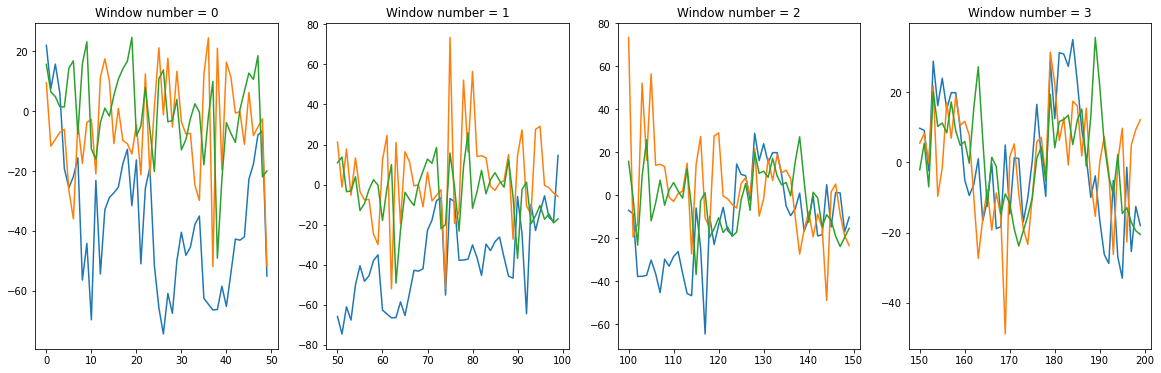

In [8]:

example_recording = base_df.groupby(['recording_id'], as_index=False)

example_recording

window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

overlapping_windows = large_enough_windows[::step_size] 

for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

final_sliding_windows

first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")

In [9]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

np.array(first_four_windows[0][columns_of_interest]).shape

(50, 6)

In [10]:
window_id_class_labels = final_sliding_windows.groupby(["window_id",'subject_id'])[['activity_type']].agg(np.min)
window_id_class_labels=window_id_class_labels.reset_index()
base_train_df=window_id_class_labels.join(base_df[columns_of_interest])

In [11]:
base_train_df

,window_id,subject_id,activity_type,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z
0,0,s1541031,Climbing stairs,0.261475,-1.116516,-0.502991,-0.812500,12.312500,19.500000
1,1,s1541031,Climbing stairs,-0.177734,-0.636292,-0.477600,-5.265625,2.953125,-9.281250
2,2,s1541031,Climbing stairs,0.351562,-0.879456,-0.335754,5.671875,24.656250,-10.562500
3,3,s1541031,Climbing stairs,0.298584,-1.253479,-0.299622,-3.609375,2.687500,5.890625
4,4,s1541031,Climbing stairs,0.056152,-0.777405,-0.210754,-14.328125,5.421875,8.140625
...,...,...,...,...,...,...,...,...,...
20218,20218,s2254050,Lying down on back,-0.270264,0.962585,-0.075012,-1.640625,0.156250,-0.781250
20219,20219,s2254050,Lying down on back,-0.272705,0.970886,-0.077209,0.406250,1.109375,-1.125000
20220,20220,s2254050,Lying down on back,-0.262207,0.971375,-0.074768,-0.390625,0.421875,-0.265625
20221,20221,s2254050,Lying down on back,-0.270752,0.970642,-0.075989,0.468750,0.343750,-1.312500


In [12]:
#split train and test by subject
def train_test_split(df, split_col, test_fraction):
    split_values = df[split_col].drop_duplicates()
    test_values = split_values.sample(frac=test_fraction, random_state=42)
    
    df_test = df[df[split_col].isin(test_values)]
    df_train = df[~df[split_col].isin(test_values)]
    return df_test, df_train

In [13]:
df_test,df_train=train_test_split(base_train_df,'subject_id',0.2)

In [14]:
df_validation,df_train=train_test_split(df_train,'subject_id',0.1)

In [15]:
print(f"The data was collected for the activities in test set: {df_test.activity_type.unique()}")
print(f"The subject IDs in the in test set are: {len(df_test.subject_id.unique())}")
print(f"The data was collected for the activities in train set: {df_train.activity_type.unique()}")
print(f"The subject IDs in the in train set are: {len(df_train.subject_id.unique())}")
print(f"The data was collected for the activities in val set: {df_validation.activity_type.unique()}")
print(f"The subject IDs in the in val set are: {len(df_validation.subject_id.unique())}")

The data was collected for the activities in test set: ['Climbing stairs' 'Descending stairs' 'Desk work' 'Falling on knees'
 'Falling on the back' 'Falling on the left' 'Falling on the right'
 'Lying down left' 'Lying down on back' 'Lying down on stomach'
 'Lying down right' 'Movement' 'Running' 'Sitting bent backward'
 'Sitting bent forward' 'Sitting' 'Standing' 'Walking at normal speed']
The subject IDs in the in test set are: 9
The data was collected for the activities in train set: ['Climbing stairs' 'Descending stairs' 'Desk work' 'Falling on knees'
 'Falling on the back' 'Falling on the left' 'Falling on the right'
 'Lying down left' 'Lying down on back' 'Lying down on stomach'
 'Lying down right' 'Movement' 'Running' 'Sitting bent backward'
 'Sitting bent forward' 'Sitting' 'Standing' 'Walking at normal speed']
The subject IDs in the in train set are: 34
The data was collected for the activities in val set: ['Climbing stairs' 'Descending stairs' 'Desk work' 'Falling on knees'
 

In [16]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):    
    shape = group[columns_of_interest].values.shape    
    X.append(group[columns_of_interest].values)
    y.append(group["activity_type"].values[0])

In [17]:
X = np.asarray(X)
y = np.asarray(y)

In [18]:
print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (20223, 50, 6)
y shape = (20223,)


In [19]:
X_train=X[df_train.index]
y_train=y[df_train.index]

X_test=X[df_test.index]
y_test=y[df_test.index]

X_validation=X[df_validation.index]
y_validation=y[df_validation.index]

In [20]:
y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)
y_validation = np.asarray(pd.get_dummies(y_validation), dtype=np.float32)

In [21]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

print(f"X_validation shape = {X_validation.shape}")
print(f"y_validation shape = {y_validation.shape}")

X_train shape = (14694, 50, 6)
y_train shape = (14694, 18)
X_test shape = (3913, 50, 6)
y_test shape = (3913, 18)
X_validation shape = (1616, 50, 6)
y_validation shape = (1616, 18)


# GRU

In [31]:
X_test[0].shape

(50, 6)

In [32]:
y_test[0].shape

(18,)

In [33]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 18
hidden_units = 64
time_steps = 5

In [34]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(GRU(128,input_shape=[50,6],dropout=0.2,use_bias=True,recurrent_dropout=0.2,return_sequences=True))
model.add(GRU(64, use_bias=True, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32))
model.add(Dense(n_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 50, 128)           52224     
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                594       
Total params: 92,146
Trainable params: 92,146
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(X_train, y_train,batch_size=256, epochs=50,callbacks=[callback],
                    validation_data=(X_validation, y_validation))

Epoch 1/50
58/58 [==============================] - 17s 217ms/step - loss: 2.0931 - accuracy: 0.3795 - val_loss: 2.3710 - val_accuracy: 0.3991
Epoch 2/50
58/58 [==============================] - 12s 207ms/step - loss: 1.3768 - accuracy: 0.5359 - val_loss: 2.0243 - val_accuracy: 0.4350
Epoch 3/50
58/58 [==============================] - 12s 207ms/step - loss: 1.1445 - accuracy: 0.5899 - val_loss: 1.9249 - val_accuracy: 0.4121
Epoch 4/50
58/58 [==============================] - 13s 224ms/step - loss: 1.0192 - accuracy: 0.6228 - val_loss: 1.9457 - val_accuracy: 0.4301
Epoch 5/50
58/58 [==============================] - 13s 221ms/step - loss: 0.9262 - accuracy: 0.6597 - val_loss: 1.9997 - val_accuracy: 0.4084
Epoch 6/50
58/58 [==============================] - 12s 210ms/step - loss: 0.8543 - accuracy: 0.6828 - val_loss: 1.9131 - val_accuracy: 0.4425
Epoch 7/50
58/58 [==============================] - 12s 208ms/step - loss: 0.7902 - accuracy: 0.7038 - val_loss: 1.9496 - val_accuracy: 0.4325

In [37]:
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

In [62]:
y_pred_ohe[0]

array([7.9421175e-01, 1.2491428e-02, 9.5879873e-03, 4.6244983e-04,
       9.9473109e-05, 9.2551502e-04, 1.1946469e-05, 2.1665460e-07,
       3.5218565e-07, 5.2791465e-06, 7.1201526e-08, 1.4077114e-01,
       3.7716829e-05, 1.7319158e-04, 1.2336957e-05, 7.7059747e-05,
       5.5952769e-05, 4.1076183e-02], dtype=float32)

In [65]:
y_pred_ohe[0].max()

0.79421175

In [66]:
y_pred_ohe[0].argmax()

0

In [63]:
y_pred_labels[0]

0

In [67]:
y_true_labels[0]

0

In [38]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       250
           1       0.65      0.78      0.71       249
           2       0.45      0.32      0.37       258
           3       0.80      0.78      0.79        68
           4       0.69      0.39      0.50        79
           5       0.70      0.57      0.63        87
           6       0.76      0.85      0.80        87
           7       0.84      1.00      0.91       258
           8       0.88      0.98      0.93       258
           9       0.98      0.99      0.99       258
          10       1.00      0.81      0.90       256
          11       0.69      0.60      0.64       258
          12       0.98      0.99      0.99       257
          13       0.28      0.32      0.30       256
     

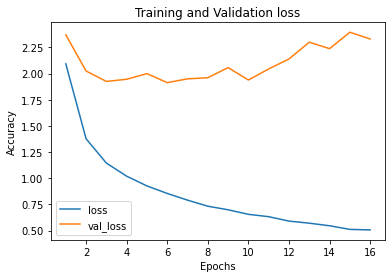

In [39]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

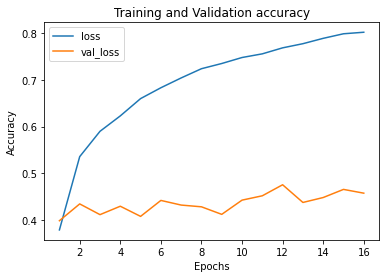

In [40]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, accuracy_train, label='loss')
plt.plot(epochs, accuracy_val, label='val_loss')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
history.history

{'loss': [2.093143939971924,
  1.3768402338027954,
  1.144487977027893,
  1.0192444324493408,
  0.9261590242385864,
  0.8543305397033691,
  0.7901850342750549,
  0.7322328090667725,
  0.6981183290481567,
  0.65472412109375,
  0.6321017146110535,
  0.5899165868759155,
  0.5700207352638245,
  0.5454290509223938,
  0.5108194947242737,
  0.5057051777839661],
 'accuracy': [0.37954267859458923,
  0.5358649492263794,
  0.5899006128311157,
  0.6227712035179138,
  0.6596570014953613,
  0.6827957034111023,
  0.7037566304206848,
  0.7234245538711548,
  0.734517514705658,
  0.7473118305206299,
  0.7551381587982178,
  0.7679324746131897,
  0.7767796516418457,
  0.7882128953933716,
  0.7979447245597839,
  0.8012113571166992],
 'val_loss': [2.3710007667541504,
  2.0243194103240967,
  1.9249069690704346,
  1.9456965923309326,
  1.9996751546859741,
  1.9131267070770264,
  1.9495508670806885,
  1.9601925611495972,
  2.0570099353790283,
  1.9383883476257324,
  2.0442235469818115,
  2.139773368835449,
  2

# CNN

In [ ]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 2

In [ ]:
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.4))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.4))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(X_train, y_train,batch_size=256, epochs=50,callbacks=[callback],
                    validation_data=(X_validation, y_validation))

In [ ]:
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

In [ ]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, accuracy_train, label='loss')
plt.plot(epochs, accuracy_val, label='val_loss')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()